In [7]:
import numpy as np
import glob
import os
import multiprocessing as mp

inp_pth = '/data/mint/DPM_Dataset/ffhq_256_with_anno/shadow_diff_with_weight_onehot/'
out_pth = '/data/mint/DPM_Dataset/ffhq_256_with_anno/shadow_diff_with_weight_simplified/'

set_ = ['/train/', '/valid/']

def proc(img, save_pth):
    img = np.load(img)
    img = img[..., 1:2]
    np.save(file=save_pth, arr=img)



for s in set_:
    print("[#] Processing: ", s)
    os.makedirs(out_pth + s, exist_ok=True)
    img_pth = glob.glob(inp_pth + s + '/*.npy')
    img_name = [os.path.basename(i) for i in img_pth]
    with mp.Pool(mp.cpu_count()) as p:
        p.starmap(proc, zip(img_pth, [out_pth + s + i for i in img_name]))

[#] Processing:  /train/
[#] Processing:  /valid/


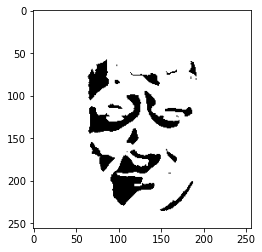

[0.0613525 1.       ]
(256, 256, 1)
(128, 128)
[0.0613525 1.       ]


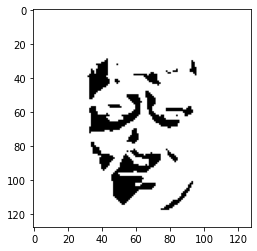

In [26]:
# Visualization
from PIL import Image
import matplotlib.pyplot as plt
import cv2

out_pth = '/data/mint/DPM_Dataset/ffhq_256_with_anno/shadow_diff_with_weight_simplified/'
img_pth = [
    out_pth + '/valid/60065.npy', 
    out_pth + '/valid/61231.npy', 
    ]
img = 1 - np.load(img_pth[0])
resolution = 128
plt.imshow(img, cmap='gray')
plt.show()
print(np.unique(img))
print(img.shape)
img_resize = cv2.resize(img, (resolution, resolution), interpolation=cv2.INTER_NEAREST)
print(img_resize.shape)
print(np.unique(img_resize))
plt.imshow(img_resize, cmap='gray')
plt.show()